# Internet Traffic Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("website data.csv")
data.head()

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
data.describe()

,Daily Visitors
count,173.000000
mean,2829.907514
std,765.194741
min,1245.000000
25%,2336.000000
50%,2751.000000
75%,3207.000000
max,7165.000000


In [5]:
data[data.duplicated()]

,Date,Daily Visitors


In [6]:
data.isnull().sum()

Date              0
Daily Visitors    0
dtype: int64

In [7]:
print(data['Daily Visitors'].describe())

count     173.000000
mean     2829.907514
std       765.194741
min      1245.000000
25%      2336.000000
50%      2751.000000
75%      3207.000000
max      7165.000000
Name: Daily Visitors, dtype: float64


In [8]:
data[data['Daily Visitors'] > 4500]

,Date,Daily Visitors
111,20-01-2022,4509
144,22-02-2022,6407
145,23-02-2022,4751
146,24-02-2022,4961
150,28-02-2022,7165
151,01-03-2022,4687


In [9]:
data['Date_copy'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data.set_index('Date_copy', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-10-01 to 2022-03-22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            173 non-null    object
 1   Daily Visitors  173 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [11]:
data.head()

,Date,Daily Visitors
Date_copy,,
2021-10-01,01-10-2021,2649
2021-10-02,02-10-2021,2000
2021-10-03,03-10-2021,2011
2021-10-04,04-10-2021,3219
2021-10-05,05-10-2021,3870


In [12]:
from scipy import stats

# Calculate Z-scores for your time series data
z_scores = np.abs(stats.zscore(data['Daily Visitors']))

# Define a threshold for outlier detection (e.g., 2 or 3 standard deviations)
threshold = 2

# Identify outliers
outliers = data['Daily Visitors'][z_scores > threshold]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
Date_copy
2021-11-04    1245
2022-01-20    4509
2022-02-22    6407
2022-02-23    4751
2022-02-24    4961
2022-02-28    7165
2022-03-01    4687
Name: Daily Visitors, dtype: int64


In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [14]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.strftime('%b')
data['Day_of_Week'] = data['Date'].dt.strftime('%A')

In [15]:
data.head()

,Date,Daily Visitors,Year,Month,Day_of_Week
Date_copy,,,,,
2021-10-01,2021-10-01,2649,2021,Oct,Friday
2021-10-02,2021-10-02,2000,2021,Oct,Saturday
2021-10-03,2021-10-03,2011,2021,Oct,Sunday
2021-10-04,2021-10-04,3219,2021,Oct,Monday
2021-10-05,2021-10-05,3870,2021,Oct,Tuesday


In [16]:
data['Year'].value_counts()

2021    92
2022    81
Name: Year, dtype: int64

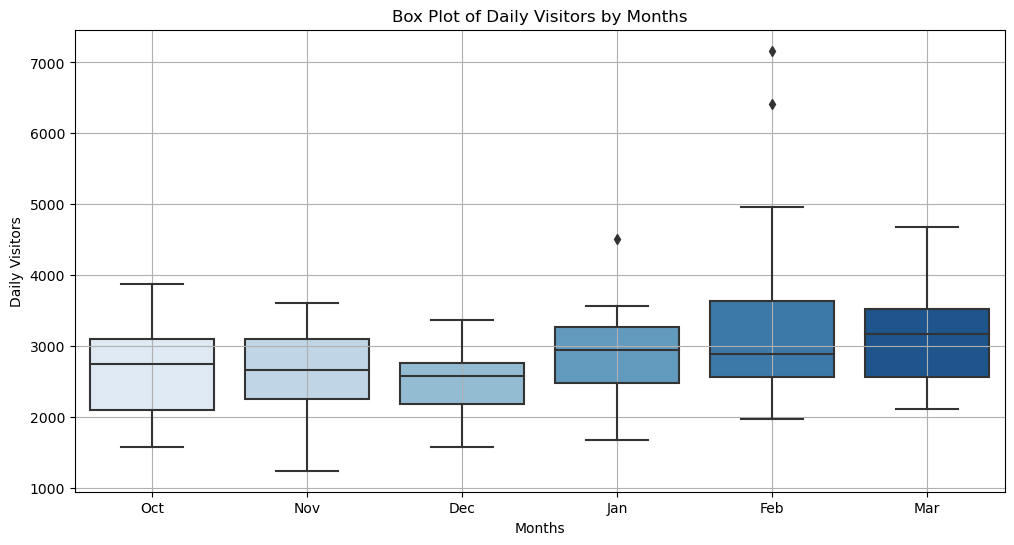

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Month', y='Daily Visitors', palette='Blues')
plt.xlabel('Months')
plt.ylabel('Daily Visitors')
plt.title('Box Plot of Daily Visitors by Months')
plt.grid(True)
plt.show()

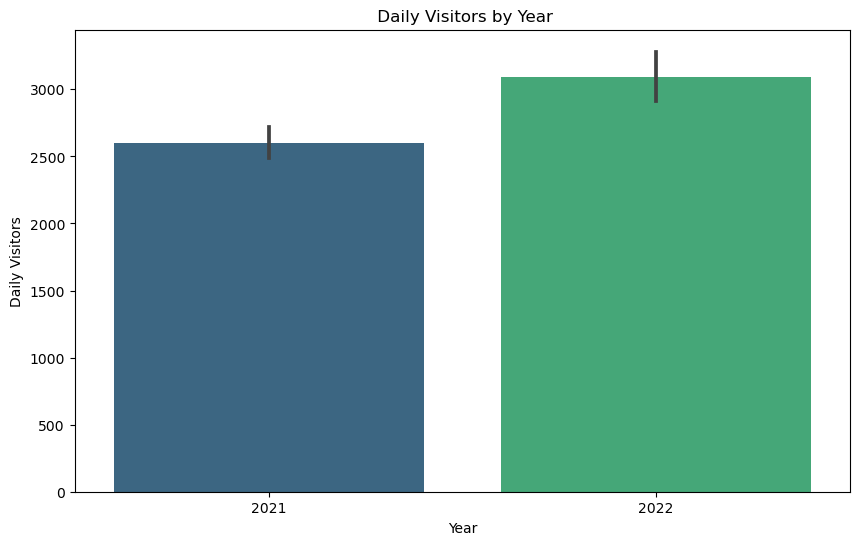

In [18]:
plt.figure(figsize=(10, 6))
plt.title(" Daily Visitors by Year")
sns.barplot(data=data, x='Year', y='Daily Visitors', palette='viridis')
plt.xlabel('Year')
plt.ylabel('Daily Visitors')

plt.show()

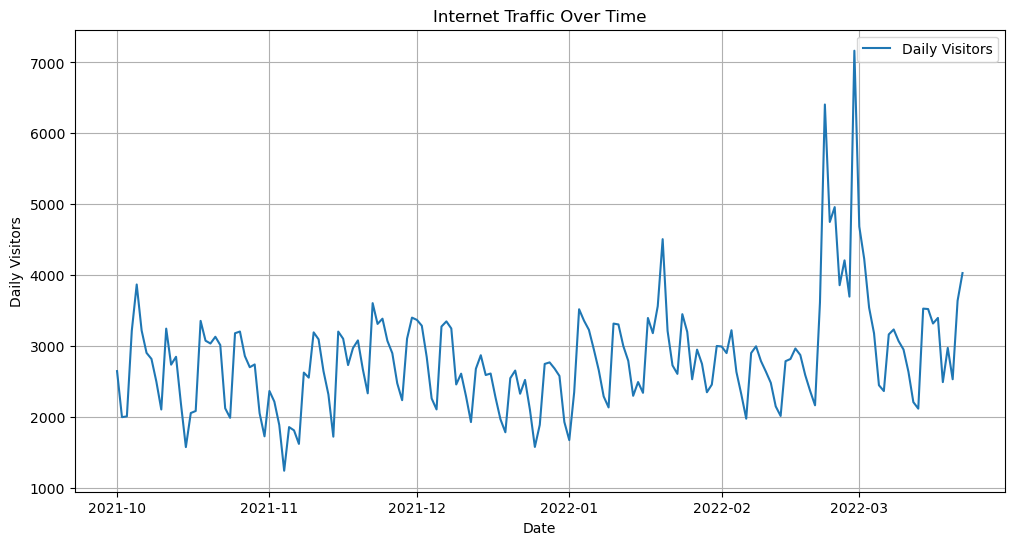

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Daily Visitors'], label='Daily Visitors')
plt.xlabel('Date')
plt.ylabel('Daily Visitors')
plt.title('Internet Traffic Over Time')
plt.legend()
plt.grid(True)
plt.show()


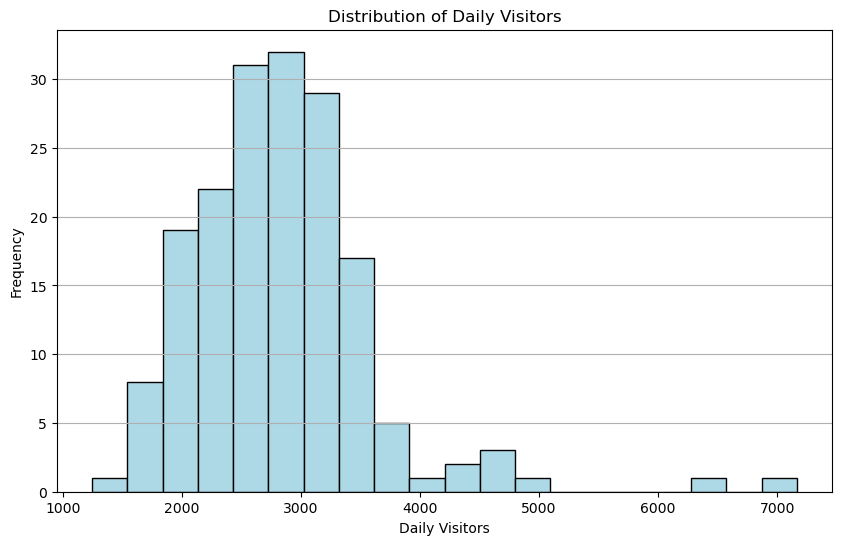

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Visitors'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Daily Visitors')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Visitors')
plt.grid(axis='y')
plt.show()

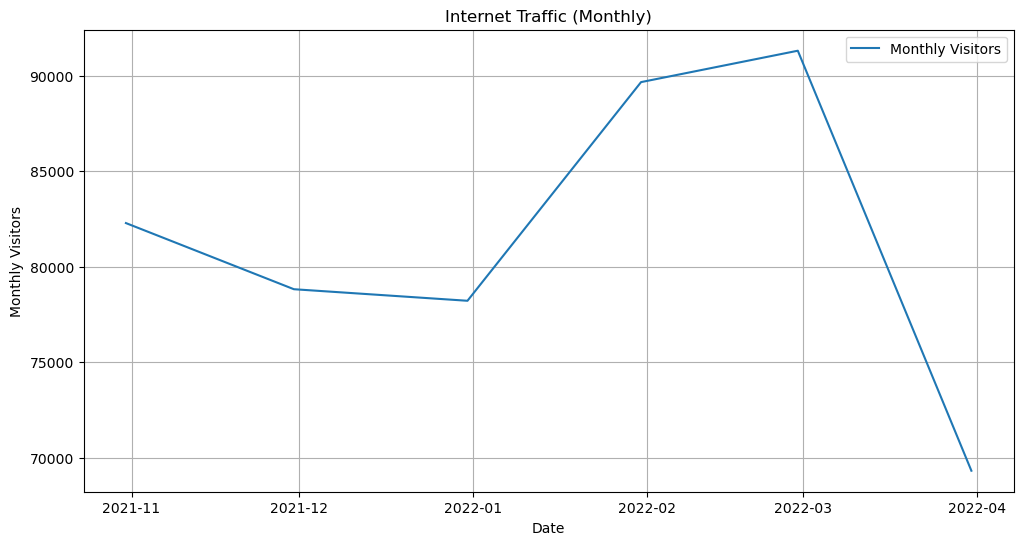

In [21]:
data.index = pd.to_datetime(data.index)

monthly_data = data.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Daily Visitors'], label='Monthly Visitors')
plt.xlabel('Date')
plt.ylabel('Monthly Visitors')
plt.title('Internet Traffic (Monthly)')
plt.legend()
plt.grid(True)
plt.show()

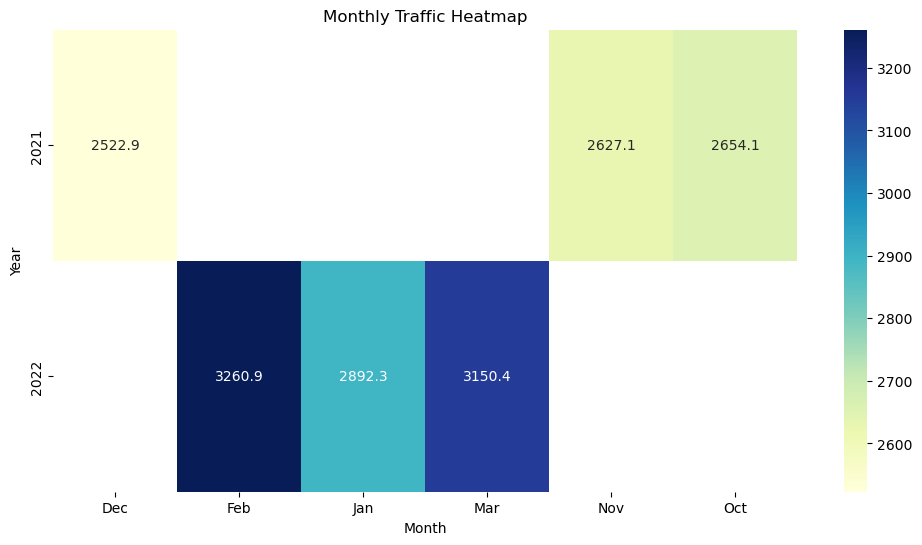

In [22]:
monthly_traffic = data.pivot_table(index='Year', columns='Month', values='Daily Visitors', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_traffic, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly Traffic Heatmap')
plt.show()

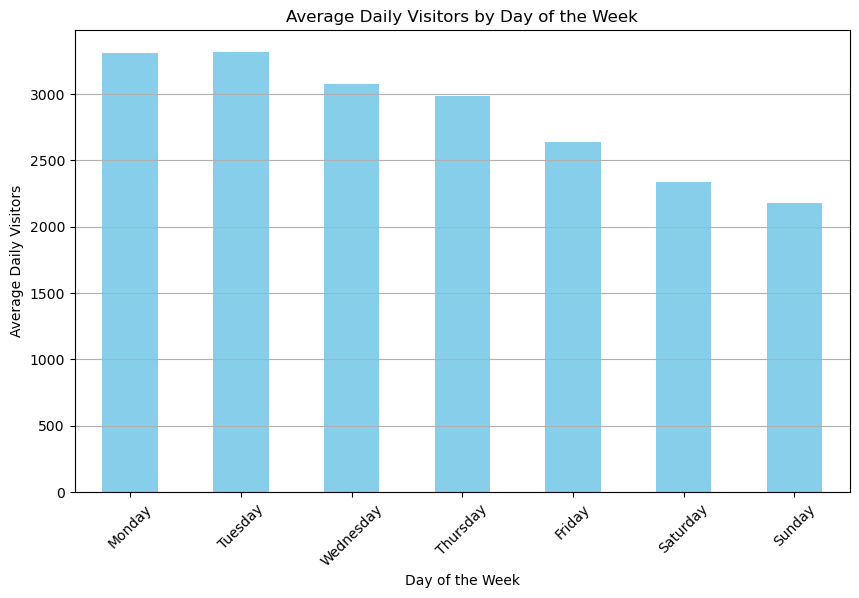

In [23]:
day_of_week_data = data.groupby('Day_of_Week')['Daily Visitors'].mean().reindex(['Monday',
                                                                               'Tuesday', 'Wednesday', 
                                                                               'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_of_week_data.plot(kind='bar', color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Visitors')
plt.title('Average Daily Visitors by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


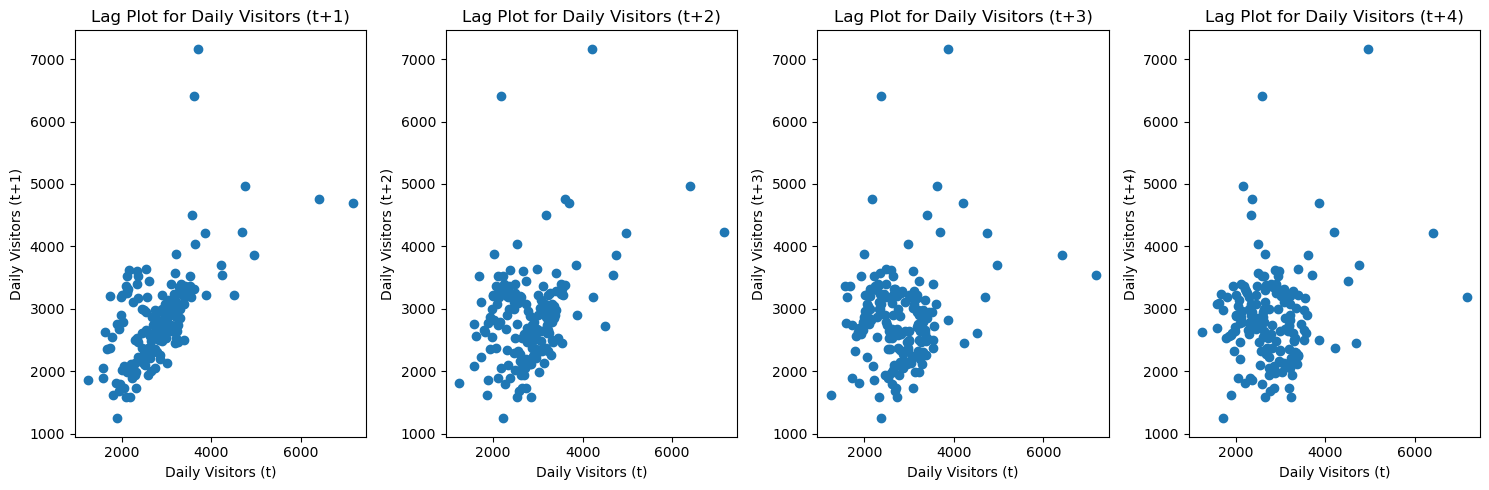

In [24]:
from pandas.plotting import lag_plot

daily_visitors = data['Daily Visitors']

lags = [1, 2, 3, 4]  


fig, axs = plt.subplots(1, len(lags), figsize=(15, 5))

for i, lag in enumerate(lags):
    lag_plot(daily_visitors, lag=lag, ax=axs[i])
    axs[i].set_title(f"Lag Plot for Daily Visitors (t+{lag})")
    axs[i].set_xlabel(f"Daily Visitors (t)")
    axs[i].set_ylabel(f"Daily Visitors (t+{lag})")

plt.tight_layout()
plt.show()


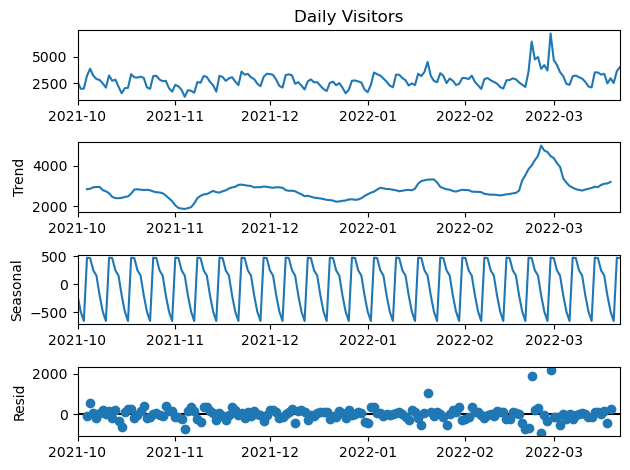

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Daily Visitors'], model='additive')
result.plot()
plt.show()

In [1]:
result = seasonal_decompose(data['Daily Visitors'], model='multiplicative')
result.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined

C:\Users\Gujar\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


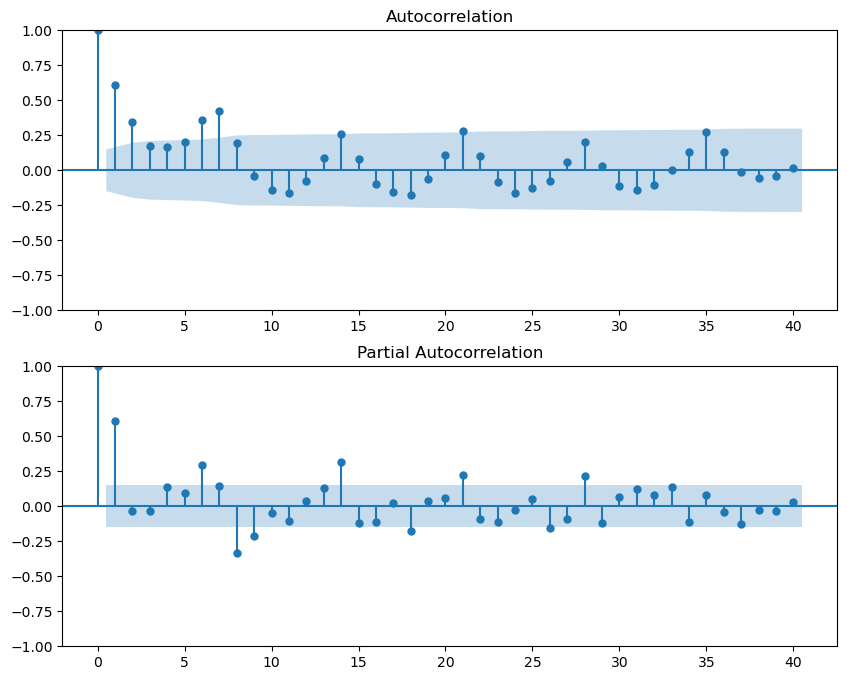

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data['Daily Visitors'], lags=40, ax=ax1)
plot_pacf(data['Daily Visitors'], lags=40, ax=ax2)
plt.show()

In [38]:
data.head()

,Date,Daily Visitors,Year,Month,Day_of_Week
Date_copy,,,,,
2021-10-01,2021-10-01,2649,2021,Oct,Friday
2021-10-02,2021-10-02,2000,2021,Oct,Saturday
2021-10-03,2021-10-03,2011,2021,Oct,Sunday
2021-10-04,2021-10-04,3219,2021,Oct,Monday
2021-10-05,2021-10-05,3870,2021,Oct,Tuesday


### Augmented Dickey Fuller Test

In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Daily Visitors'])
p_value = result[1]

if p_value <= 0.05:
    print("Data is likely stationary.")
else:
    print("Data is likely non-stationary.")


Data is likely non-stationary.


### Differencing to make data  stationary

In [44]:
data['Daily Visitors Diff'] = data['Daily Visitors'] - data['Daily Visitors'].shift(1)

data = data.dropna()


In [47]:
data.head()

,Date,Daily Visitors,Year,Month,Day_of_Week,Daily Visitors Diff
Date_copy,,,,,,
2021-10-02,2021-10-02,2000,2021,Oct,Saturday,-649.0
2021-10-03,2021-10-03,2011,2021,Oct,Sunday,11.0
2021-10-04,2021-10-04,3219,2021,Oct,Monday,1208.0
2021-10-05,2021-10-05,3870,2021,Oct,Tuesday,651.0
2021-10-06,2021-10-06,3222,2021,Oct,Wednesday,-648.0


In [48]:
result = adfuller(data['Daily Visitors Diff'])
p_value = result[1]

if p_value <= 0.05:
    print("Differenced data is likely stationary.")
else:
    print("Differenced data is likely non-stationary.")


Differenced data is likely stationary.


In [2]:
from sklearn.metrics import r2_score
original=df[['y']]
prediction=forecast[['yhat']]
r2_score(original,prediction)
print("Accuracy of the model is :",100*r2_score(original,prediction))

NameError: name 'df' is not defined